# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [198]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter


## 1.1 Reading Data

In [316]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [317]:
print("Number of data points in train data", project_data.shape)
project_data = project_data.iloc[:5000];
print("Number of data points in train data after reducing number of rows", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
Number of data points in train data (5000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [318]:
print("Number of data points in train data", resource_data.shape)

print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects thar are approved for funding  4237 , ( 84.74000000000001 %)
Number of projects thar are not approved for funding  763 , ( 15.260000000000002 %)


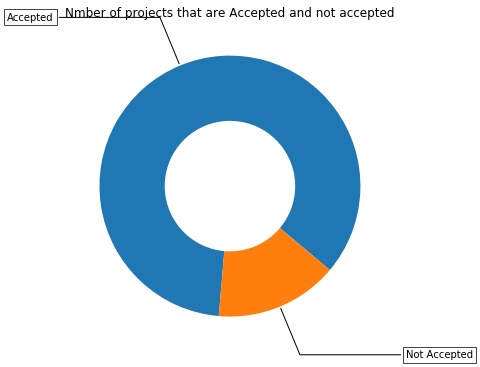

In [319]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [320]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')


In [321]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.500000
41         SD       0.687500
7          DC       0.695652
0          AK       0.705882
50         WY       0.777778
States with highest % approvals
   state_code  num_proposals
11         HI       0.964286
16         KS       0.966667
28         ND       1.000000
8          DE       1.000000
30         NH       1.000000


In [322]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [323]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

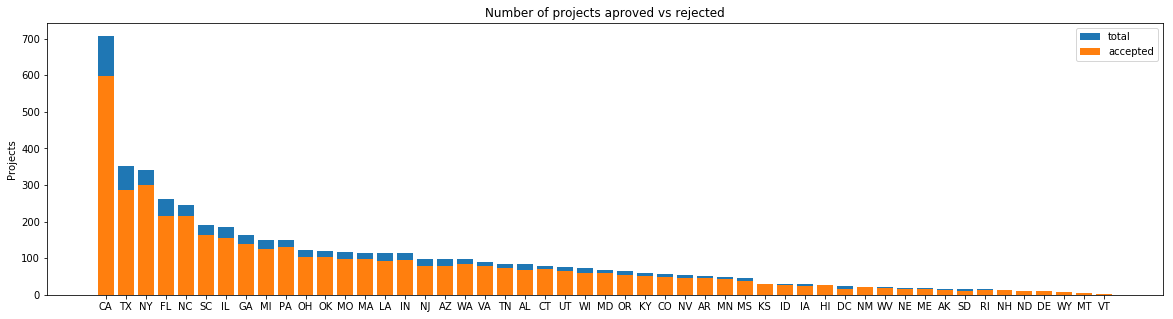

   school_state  project_is_approved  total       Avg
4            CA                  597    707  0.844413
43           TX                  286    352  0.812500
34           NY                  299    342  0.874269
9            FL                  215    261  0.823755
27           NC                  216    246  0.878049
   school_state  project_is_approved  total       Avg
28           ND                   11     11  1.000000
8            DE                   11     11  1.000000
50           WY                    7      9  0.777778
26           MT                    5      6  0.833333
46           VT                    1      2  0.500000


In [324]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

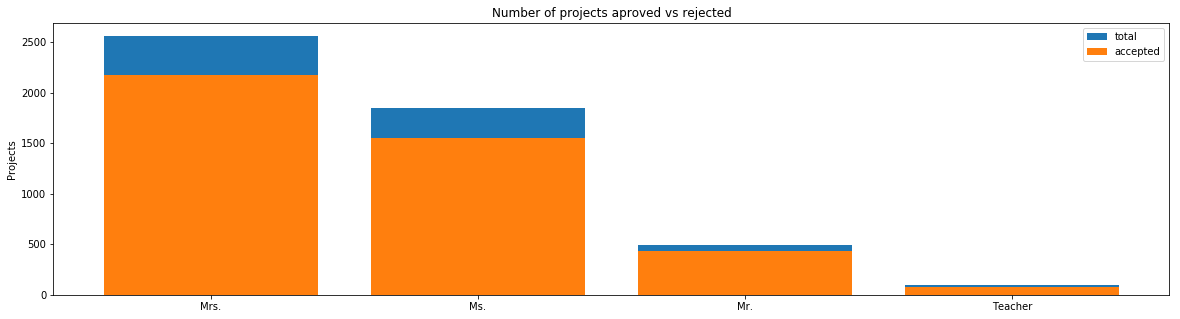

  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 2173   2560  0.848828
2            Ms.                 1554   1845  0.842276
0            Mr.                  433    495  0.874747
3        Teacher                   77    100  0.770000
  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 2173   2560  0.848828
2            Ms.                 1554   1845  0.842276
0            Mr.                  433    495  0.874747
3        Teacher                   77    100  0.770000


In [325]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### 1.2.3 Univariate Analysis: project_grade_category

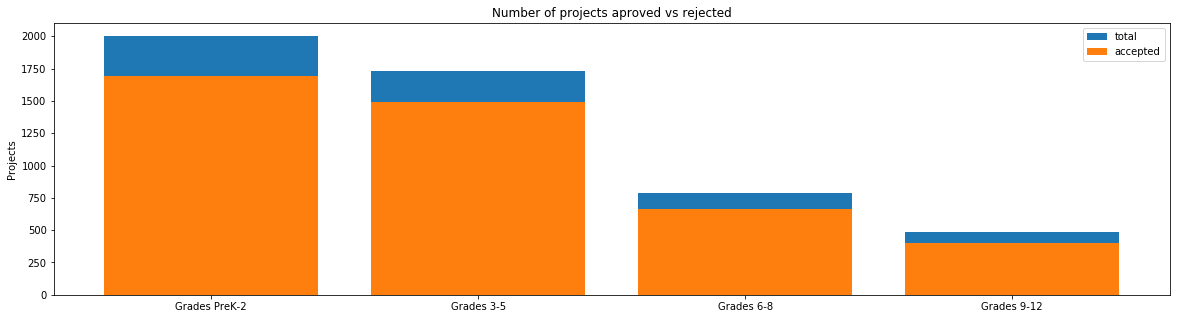

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 1689   2002  0.843656
0             Grades 3-5                 1491   1729  0.862348
1             Grades 6-8                  660    785  0.840764
2            Grades 9-12                  397    484  0.820248
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 1689   2002  0.843656
0             Grades 3-5                 1491   1729  0.862348
1             Grades 6-8                  660    785  0.840764
2            Grades 9-12                  397    484  0.820248


In [326]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [327]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [328]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

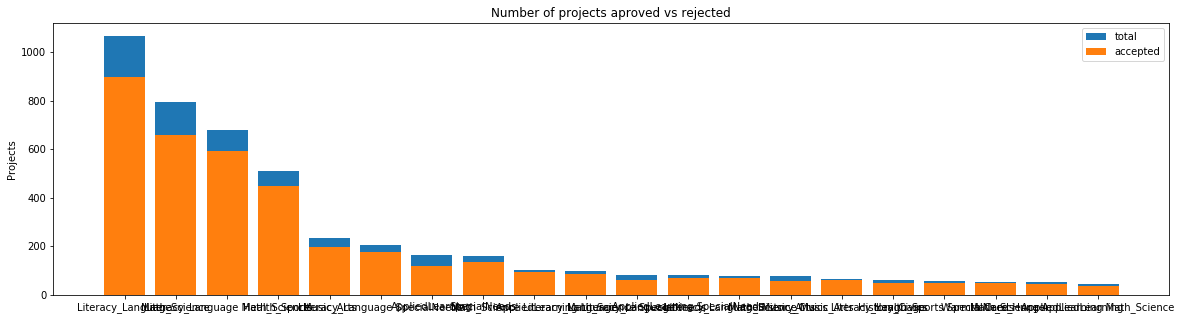

                  clean_categories  project_is_approved  total       Avg
23               Literacy_Language                  900   1067  0.843486
30                    Math_Science                  659    795  0.828931
26  Literacy_Language Math_Science                  594    679  0.874816
8                    Health_Sports                  447    509  0.878193
37                      Music_Arts                  199    233  0.854077
                clean_categories  project_is_approved  total       Avg
16                History_Civics                   47     63  0.746032
14    Health_Sports SpecialNeeds                   49     57  0.859649
46            Warmth Care_Hunger                   47     53  0.886792
31  Math_Science AppliedLearning                   44     52  0.846154
4   AppliedLearning Math_Science                   35     44  0.795455


In [329]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [330]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())


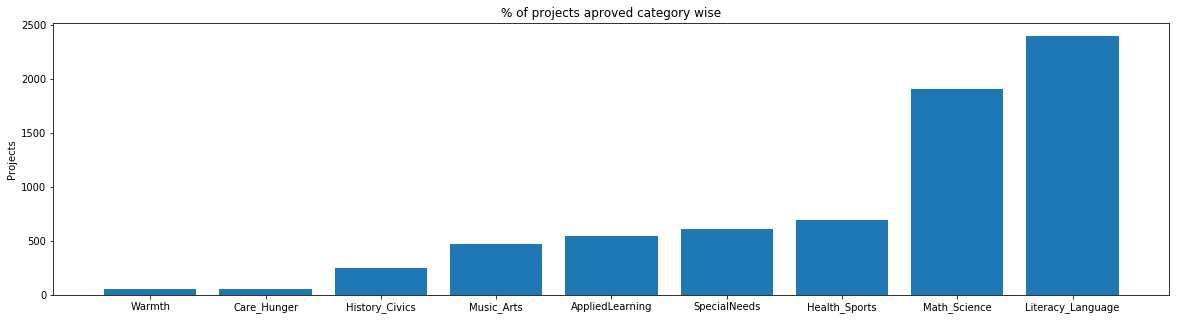

In [331]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [332]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :        58
Care_Hunger          :        58
History_Civics       :       252
Music_Arts           :       476
AppliedLearning      :       547
SpecialNeeds         :       614
Health_Sports        :       697
Math_Science         :      1910
Literacy_Language    :      2400


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [333]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [334]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

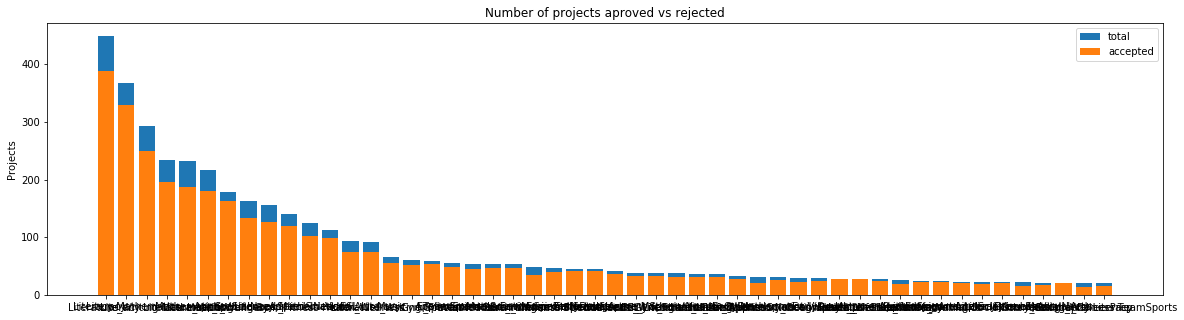

                clean_subcategories  project_is_approved  total       Avg
189                        Literacy                  389    449  0.866370
191            Literacy Mathematics                  329    368  0.894022
201  Literature_Writing Mathematics                  250    293  0.853242
190     Literacy Literature_Writing                  195    234  0.833333
209                     Mathematics                  188    232  0.810345
            clean_subcategories  project_is_approved  total       Avg
23   AppliedSciences VisualArts                   15     22  0.681818
230          Other SpecialNeeds                   17     21  0.809524
181  History_Geography Literacy                   20     21  0.952381
56           College_CareerPrep                   14     20  0.700000
177  Health_Wellness TeamSports                   15     20  0.750000


In [335]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [336]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

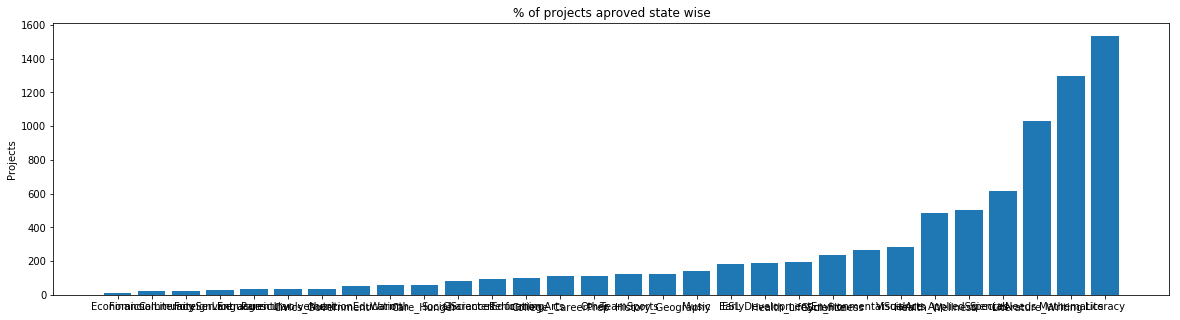

In [337]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [338]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :        14
FinancialLiteracy    :        23
CommunityService     :        26
ForeignLanguages     :        29
Extracurricular      :        33
ParentInvolvement    :        34
Civics_Government    :        36
NutritionEducation   :        54
Warmth               :        58
Care_Hunger          :        58
SocialSciences       :        82
CharacterEducation   :        95
PerformingArts       :       102
College_CareerPrep   :       113
Other                :       114
TeamSports           :       123
History_Geography    :       124
Music                :       142
ESL                  :       182
EarlyDevelopment     :       189
Health_LifeScience   :       196
Gym_Fitness          :       237
EnvironmentalScience :       265
VisualArts           :       282
Health_Wellness      :       486
AppliedSciences      :       504
SpecialNeeds         :       614
Literature_Writing   :      1032
Mathematics          :      1295
Literacy             :      1534


### 1.2.6 Univariate Analysis: Text features (Title)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


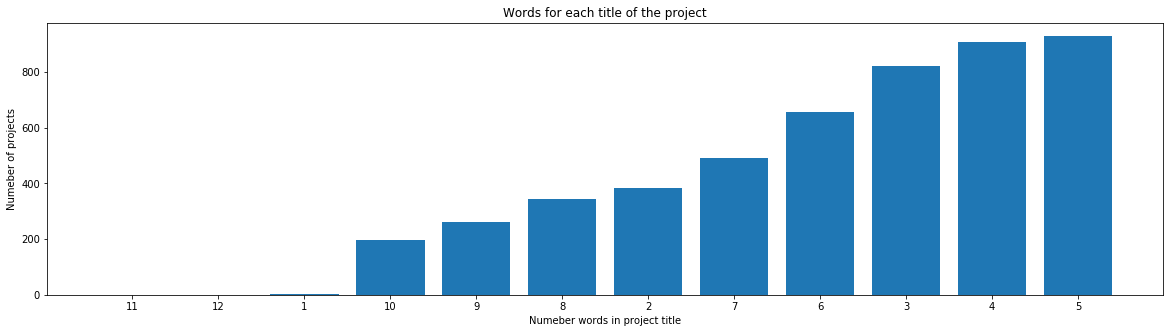

In [339]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
print(ind)
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [340]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

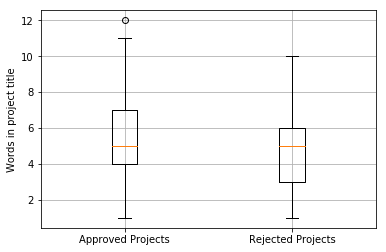

In [341]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

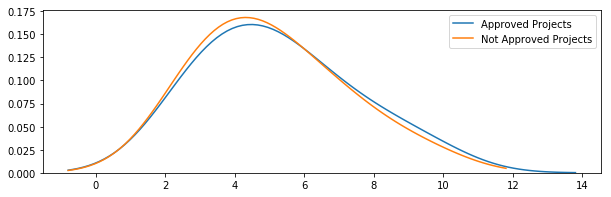

In [342]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [343]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [344]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

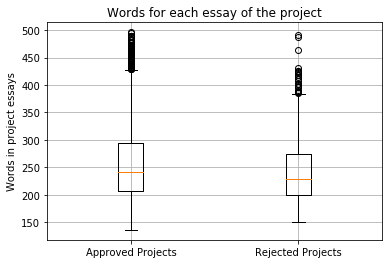

In [345]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

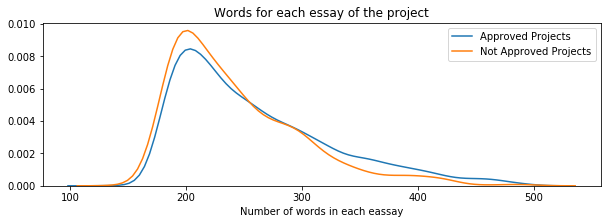

In [346]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [347]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [348]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [349]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [350]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

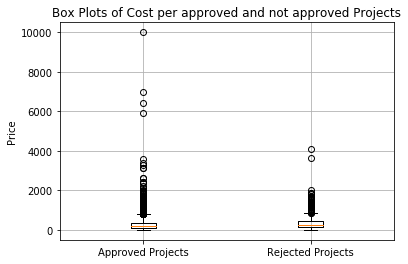

In [351]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

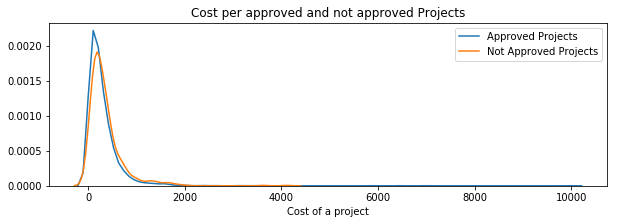

In [352]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [353]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        1.44       |          5.19         |
|     5      |       14.664      |         40.045        |
|     10     |       35.41       |         75.106        |
|     15     |       56.788      |        104.181        |
|     20     |       75.848      |        126.288        |
|     25     |       100.21      |        145.665        |
|     30     |      119.948      |        159.996        |
|     35     |       139.99      |        180.088        |
|     40     |       159.43      |        207.546        |
|     45     |       179.0       |        232.279        |
|     50     |       200.77      |         258.07        |
|     55     |      229.636      |        289.256        |
|     60     |      259.744      |        314.946        |
|     65     |      288.936      |        357.846       

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

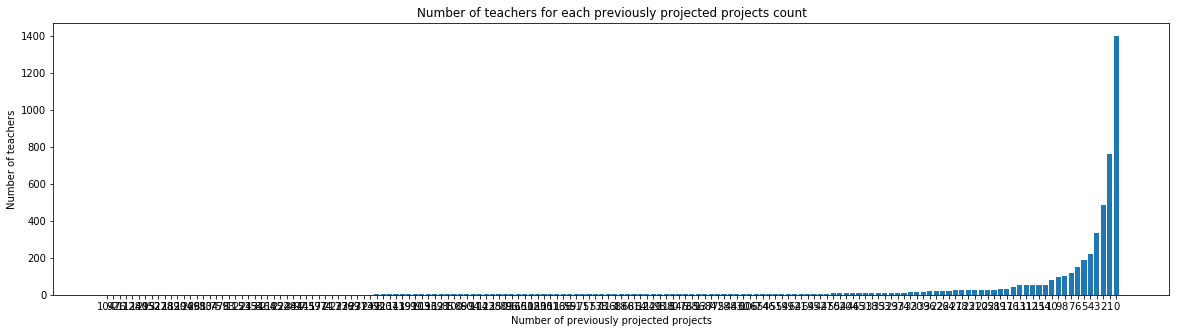

   no_of_previous_projects  teacher_number_of_previously_posted_projects
0                        0                                          1399
1                        1                                           760
2                        2                                           486
3                        3                                           335
4                        4                                           221
****************************************************************************************************
     no_of_previous_projects  teacher_number_of_previously_posted_projects
153                      279                                             1
154                      269                                             1
155                      277                                             1
156                      313                                             1
157                      249                                             1
***********

In [354]:

total_projects = project_data.teacher_number_of_previously_posted_projects.value_counts();
total_project_dict = dict(total_projects);
total_project_dict = dict(sorted(total_project_dict.items(), key=lambda kv: kv[1]))

ind = np.arange(len(total_project_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(total_project_dict.values()))
plt.ylabel('Number of teachers')
plt.xlabel('Number of previously projected projects')
plt.title('Number of teachers for each previously projected projects count');
plt.xticks(ind, list(total_project_dict.keys()))
plt.show()

df = pd.DataFrame(total_projects).reset_index().rename(columns={'index': 'no_of_previous_projects'});
print(df.head());
print('*'*100);
print(df.tail());

print('*'*100)
print('No of teachers who have highest no of previously projected projects');
df = df.sort_values('no_of_previous_projects', ascending=False);
print(df.head(1))
# print('Large no of teachers have: {} No of teachers has {} number of previously posted projects'.format(df.iloc[0]['teacher_number_of_previously_posted_projects'], df.iloc[0]['no_of_previous_projects']))


### Observation
* There are large no of teachers who have 0 no of previously projected projects.
* There is only one teacher who have highest no of previously projected project whose count is 451

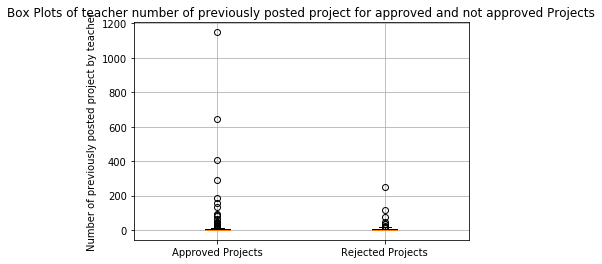

In [355]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
teach_no_for_approved = project_data[project_data.project_is_approved == 1].teacher_number_of_previously_posted_projects.value_counts();
teach_no_for_not_approved = project_data[project_data.project_is_approved == 0].teacher_number_of_previously_posted_projects.value_counts();

plt.boxplot([teach_no_for_approved, teach_no_for_not_approved])
plt.title('Box Plots of teacher number of previously posted project for approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Number of previously posted project by teacher')
plt.grid()
plt.show()

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

In [437]:
import re;

pattern = '[0-9]';

summaries = list(project_data['project_resource_summary'].values)
summary_list_digits_present_count = [];
summary_list_digits_not_present = [];
for s in summaries:
    count = 0;
    for i in s.split():
        if re.search(pattern, i):
            count+=1;
    
    summary_list_digits_present_count.append(count)
    if count == 0:
        summary_list_digits_not_present.append(1);
    else:
        summary_list_digits_not_present.append(0);
x = PrettyTable()
x.field_names = ["summary", "digits present's count", "digits not present"];
for i in range(len(summaries)):
    x.add_row([summaries[i], summary_list_digits_present_count[i], summary_list_digits_not_present[i]]);
print(x.get_string(start=1, end = 40))


+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------+--------------------+
|                                                                                                                  summary                                                                                                                  | digits present's count | digits not present |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------+--------------------+
|                                                                                   My students need a projector to help with viewing educational pr

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------+--------------------+


In [453]:
#computing sum in pandas dataFrame https://www.geeksforgeeks.org/python-pandas-dataframe-sum/

project_data['Resource_digit_count'] = summary_list_digits_present_count;
present_digitCount_for_approved = project_data[(project_data.project_is_approved == 1) & (project_data.Resource_digit_count > 0)].Resource_digit_count.value_counts();
present_digitCount_for_rejected = project_data[(project_data.project_is_approved == 0) & (project_data.Resource_digit_count > 0)].Resource_digit_count.value_counts();
# print(present_digitCount_for_approved);
# print(present_digitCount_for_rejected);

not_present_digitCount_for_approved = project_data[(project_data.project_is_approved == 1) & (project_data.Resource_digit_count == 0)].Resource_digit_count.value_counts();
not_present_digitCount_for_rejected = project_data[(project_data.project_is_approved == 0) & (project_data.Resource_digit_count == 0)].Resource_digit_count.value_counts();
# print(not_present_digitCount_for_approved);
# print(not_present_digitCount_for_rejected);

counts_digit_present_for_approved = present_digitCount_for_approved.sum(axis = 0, skipna = True) 
counts_digit_present_for_rejected = present_digitCount_for_rejected.sum(axis = 0, skipna = True) 
counts_digit_not_present_for_approved = not_present_digitCount_for_approved.sum(axis = 0, skipna=True);
counts_digit_not_present_for_rejected = not_present_digitCount_for_rejected.sum(axis = 0, skipna=True);

approved_percentage_digit_present = (counts_digit_present_for_approved/ (counts_digit_present_for_approved + counts_digit_present_for_rejected))*100;
approved_percentage_digit_not_present = (counts_digit_not_present_for_approved/ (counts_digit_not_present_for_approved + counts_digit_not_present_for_rejected))*100
print('percentage of approved projects when digits are present ', approved_percentage_digit_present);
print('percentage of approved projects when digits are not present ', approved_percentage_digit_not_present)

percentage of approved projects when digits are present  88.54314002828855
percentage of approved projects when digits are not present  84.11367342184953


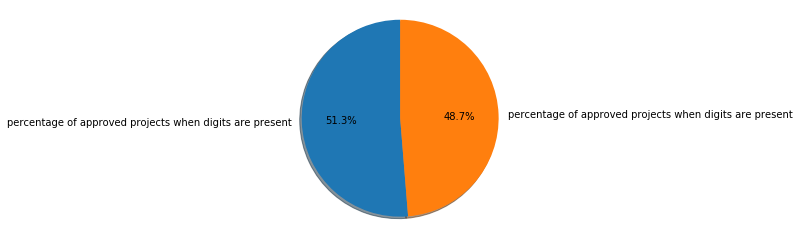

In [456]:
#pie chart in matplotlib https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

data = [approved_percentage_digit_present, approved_percentage_digit_not_present];
labels = ['percentage of approved projects when digits are present', 'percentage of approved projects when digits are present'];

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Observation:
* project acceptance percent is 2 % more when digits are present
* Since it has a slight impact of presence there we keep digits.

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [358]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2  ... project_essay_4  \
0  \"The limits of your language are the limits o...  ...             NaN   
1  The projector we need for our school is very c...  ...             NaN   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

   Resource_digit_count  
0                     0  
1                     0  

[2 rows x 21 columns]

In [360]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
# print(project_data['essay'].values[20000])
# print("="*50)
# print(project_data['essay'].values[99999])
# print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [362]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [361]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

Describing my students is not an easy task.  Many would say that they are inspirational, creative, and hard-working.  They are all unique - unique in their interests, their learning, their abilities, and so much more.  What they all have in common is their desire to learn each day, despite difficulties that they encounter.  \r\nOur classroom is amazing - because we understand that everyone learns at their own pace.  As the teacher, I pride myself in making sure my students are always engaged, motivated, and inspired to create their own learning! \r\nThis project is to help my students choose seating that is more appropriate for them, developmentally.  Many students tire of sitting in chairs during lessons, and having different seats available helps to keep them engaged and learning.\r\nFlexible seating is important in our classroom, as many of our students struggle with attention, focus, and engagement.  We currently have stability balls for seating, as well as regular chairs, but thes

In [363]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Describing my students is not an easy task.  Many would say that they are inspirational, creative, and hard-working.  They are all unique - unique in their interests, their learning, their abilities, and so much more.  What they all have in common is their desire to learn each day, despite difficulties that they encounter.    Our classroom is amazing - because we understand that everyone learns at their own pace.  As the teacher, I pride myself in making sure my students are always engaged, motivated, and inspired to create their own learning!   This project is to help my students choose seating that is more appropriate for them, developmentally.  Many students tire of sitting in chairs during lessons, and having different seats available helps to keep them engaged and learning.  Flexible seating is important in our classroom, as many of our students struggle with attention, focus, and engagement.  We currently have stability balls for seating, as well as regular chairs, but these stoo

In [364]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Describing my students is not an easy task Many would say that they are inspirational creative and hard working They are all unique unique in their interests their learning their abilities and so much more What they all have in common is their desire to learn each day despite difficulties that they encounter Our classroom is amazing because we understand that everyone learns at their own pace As the teacher I pride myself in making sure my students are always engaged motivated and inspired to create their own learning This project is to help my students choose seating that is more appropriate for them developmentally Many students tire of sitting in chairs during lessons and having different seats available helps to keep them engaged and learning Flexible seating is important in our classroom as many of our students struggle with attention focus and engagement We currently have stability balls for seating as well as regular chairs but these stools will help students who have trouble wi

In [365]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [366]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1248.25it/s]


In [367]:
# after preprocesing
preprocessed_essays[2000]

'describing students not easy task many would say inspirational creative hard working they unique unique interests learning abilities much what common desire learn day despite difficulties encounter our classroom amazing understand everyone learns pace as teacher i pride making sure students always engaged motivated inspired create learning this project help students choose seating appropriate developmentally many students tire sitting chairs lessons different seats available helps keep engaged learning flexible seating important classroom many students struggle attention focus engagement we currently stability balls seating well regular chairs stools help students trouble balance find difficult sit stability ball long period time we excited try stools part engaging classroom community nannan'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [368]:
# similarly you can preprocess the titles also

print(project_data['project_title'].values[3])

print(project_data['project_title'].values[40]);

print(project_data['project_title'].values[500]);

print(project_data['project_title'].values[4000]);

print(project_data['project_title'].values[2000]);

Techie Kindergarteners
Leveling Books in a Multi-Age Class
Classroom Chromebooks for College Bound Seniors!
Inspire Summer Reading!
Steady Stools for Active Learning


In [369]:

processed_titles = [];
for title in tqdm(project_data['project_title'].values):
    sent = decontracted(title)
    sent = re.sub('\S*\d\S*', '', sent);
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    processed_titles.append(sent.strip())

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 25922.42it/s]


In [370]:
project_data['processed_titles'] = processed_titles

#testing after preprocessing project_title column
print(processed_titles[3])

print(processed_titles[40]);

print(processed_titles[500]);

print(processed_titles[4000]);

print(processed_titles[2000]);

Techie Kindergarteners
Leveling Books in a Multi Age Class
Classroom Chromebooks for College Bound Seniors
Inspire Summer Reading
Steady Stools for Active Learning


## 1. 4 Preparing data for models

In [371]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'Resource_digit_count', 'processed_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [372]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (5000, 9)


In [373]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)


['Economics', 'FinancialLiteracy', 'CommunityService', 'ForeignLanguages', 'Extracurricular', 'ParentInvolvement', 'Civics_Government', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'CharacterEducation', 'PerformingArts', 'College_CareerPrep', 'Other', 'TeamSports', 'History_Geography', 'Music', 'ESL', 'EarlyDevelopment', 'Health_LifeScience', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (5000, 30)


In [374]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also
#one hot encoding of state
state_dict = dict(project_data['school_state'].value_counts())

vectorizer = CountVectorizer(vocabulary=list(state_dict.keys()), lowercase=False, binary=True);
vectorizer.fit(project_data['school_state'].values);
print(vectorizer.get_feature_names());

school_state_one_hot = vectorizer.transform(project_data['school_state'].values);
print('shape of matrix after one hot encoding of school_state ', school_state_one_hot.shape)

['CA', 'TX', 'NY', 'FL', 'NC', 'SC', 'IL', 'GA', 'PA', 'MI', 'OH', 'OK', 'MO', 'MA', 'LA', 'IN', 'NJ', 'AZ', 'WA', 'VA', 'TN', 'AL', 'CT', 'UT', 'WI', 'MD', 'OR', 'KY', 'CO', 'NV', 'AR', 'MN', 'MS', 'KS', 'ID', 'IA', 'HI', 'DC', 'NM', 'WV', 'ME', 'NE', 'AK', 'SD', 'RI', 'NH', 'ND', 'DE', 'WY', 'MT', 'VT']
shape of matrix after one hot encoding of school_state  (5000, 51)


In [375]:
#Error: np.nan is an invalid document, expected byte or unicode string CountVectorizer, 
#solution found at: https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document/39308809#39308809

#one hot encoding of teacher_prefix
teacher_dict = dict(project_data['teacher_prefix'].value_counts());

vectorizer = CountVectorizer(vocabulary=list(teacher_dict.keys()), lowercase=False, binary=True);

vectorizer.fit(project_data['teacher_prefix'].values.astype('U'));
print(vectorizer.get_feature_names());

teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype('U'));
print('shape of materix after one hot encoding of teacher_prefix ', teacher_prefix_one_hot.shape)

['Mrs.', 'Ms.', 'Mr.', 'Teacher']
shape of materix after one hot encoding of teacher_prefix  (5000, 4)


In [376]:
#one hot encoding of project_grade_category;
grades_dict = dict(project_data['project_grade_category'].value_counts());

vectorizer = CountVectorizer(vocabulary=list(grades_dict.keys()), lowercase=False, binary=True);

vectorizer.fit(project_data['project_grade_category'].values);
print(vectorizer.get_feature_names());

grades_one_hot = vectorizer.transform(project_data['project_grade_category'].values);
print('shape of matrix after one hot encoding of project_grade_category', grades_one_hot.shape)

['Grades PreK-2', 'Grades 3-5', 'Grades 6-8', 'Grades 9-12']
shape of matrix after one hot encoding of project_grade_category (5000, 4)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [377]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (5000, 4373)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [378]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
print(project_data['processed_titles'].values)
vectorizer = CountVectorizer(min_df=10);
title_bow = vectorizer.fit_transform(project_data['processed_titles'].values);
print('Shape of matrix after one hot encoding ', title_bow.shape)

['Educational Support for English Learners at Home'
 'Wanted Projector for Hungry Learners'
 'Soccer Equipment for AWESOME Middle School Students' ...
 'Read in Comfort' 'Read Baby Read Favorite Titles'
 'SOCK IT OUT IN BASKETBALL']
Shape of matrix after one hot encoding  (5000, 383)


#### 1.4.2.3 TFIDF vectorizer

In [379]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (5000, 4373)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [380]:
# Similarly you can vectorize for title also

vectorizer = TfidfVectorizer(min_df=10);
title_tfidf = vectorizer.fit_transform(project_data['processed_titles'].values);
print('Shape of matrix after one hot encoding ', title_tfidf.shape)


Shape of matrix after one hot encoding  (5000, 383)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [381]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [382]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [383]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 2516.59it/s]


5000
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [384]:
# Similarly you can vectorize for title also
title_avg_w2v_vectors = [];
for sentance in tqdm(project_data['processed_titles']):
    vector = np.zeros(300);
    cnt_words = 0;
    for word in sentance.split():
        if word in glove_words:
            vector += model[word];
            cnt_words += 1;
            
    if cnt_words != 0:
        vector /= cnt_words;
    title_avg_w2v_vectors.append(vector);

print(len(title_avg_w2v_vectors));
print(len(title_avg_w2v_vectors[0]));

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 60278.06it/s]


5000
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [385]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [386]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 399.31it/s]


5000
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [387]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer();
tfidf_model.fit(project_data['processed_titles'].values);
dictionary_idf = dict(zip(tfidf_model.get_feature_names(), tfidf_model.idf_));
tfidf_words = tfidf_model.get_feature_names();

In [388]:
title_tf_idf_w2v = [];
for sentance in tqdm(project_data['processed_titles']):
    vector = np.zeros(300);
    tf_idf_weight = 0;
    for word in sentance.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word];
            tfidf = dictionary_idf[word] * ( sentance.count(word)/len(sentance.split()) );
            vector = (tfidf * vec);
            tf_idf_weight += tfidf;
    if tf_idf_weight != 0:
        vector /= tf_idf_weight;
    title_tf_idf_w2v.append(vector);
    
print(len(title_tf_idf_w2v))
print(len(title_tf_idf_w2v))

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 13897.23it/s]


5000
5000


### 1.4.3 Vectorizing Numerical features

In [389]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 302.78363, Standard deviation : 376.3799456048676


In [390]:
price_standardized

array([[-0.39370756],
       [-0.01005269],
       [ 0.56875073],
       ...,
       [-0.49814989],
       [-0.35127703],
       [-0.69826683]])

In [413]:
teacher_number_of_previously_posted_projects_scalar = StandardScaler();
teacher_number_of_previously_posted_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));
print("Mean: {}, Standard deviation: {}".format(teacher_number_of_previously_posted_projects_scalar.mean_[0], np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])));

teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean: 10.7566, Standard deviation: 26.79330058876659


### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [391]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(5000, 9)
(5000, 30)
(5000, 4373)
(5000, 1)


In [392]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(5000, 4413)

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_grade_category : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

In [493]:
from scipy.sparse import hstack

first_matrix = hstack((school_state_one_hot, categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot, grades_one_hot, title_bow, price_standardized, teacher_number_of_previously_posted_projects_standardized))
second_matrix = hstack((school_state_one_hot, categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot, grades_one_hot, title_tfidf, price_standardized, teacher_number_of_previously_posted_projects_standardized))
third_matrix = hstack((school_state_one_hot, categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot, grades_one_hot, title_avg_w2v_vectors, price_standardized, teacher_number_of_previously_posted_projects_standardized))
fourth_matrix = hstack((school_state_one_hot, categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot, grades_one_hot, title_tf_idf_w2v, price_standardized, teacher_number_of_previously_posted_projects_standardized))
final_matrix = hstack((school_state_one_hot, categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot, grades_one_hot, title_tf_idf_w2v, title_avg_w2v_vectors, title_tfidf, title_bow, price_standardized, teacher_number_of_previously_posted_projects_standardized))

#converting sparse matrix into dense matrix:
first_matrix = first_matrix.toarray();
second_matrix = second_matrix.toarray();
third_matrix = third_matrix.toarray();
fourth_matrix = fourth_matrix.toarray();
final_matrix = final_matrix.toarray();
# print(project_data.columns)
# school_state_one_hot.toarray()
# print(categories_one_hot.shape)
# print(sub_categories_one_hot.shape)
# print(teacher_prefix_one_hot.shape)
# print(grades_one_hot.shape)
# print(title_bow.shape)
# print(title_tfidf.shape)
# print(len(title_avg_w2v_vectors))
# print(len(title_tf_idf_w2v))
# print(price_standardized.shape)

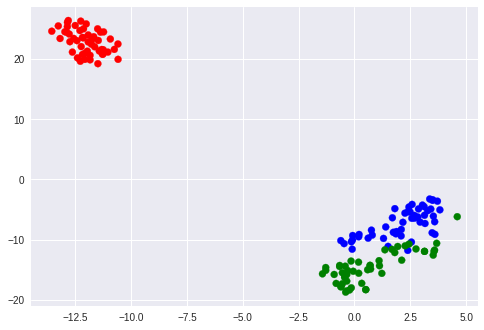

In [1]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

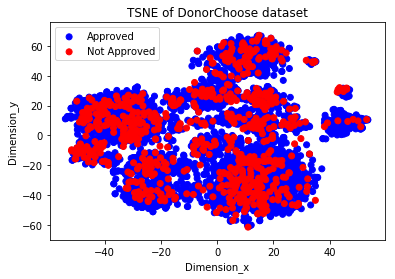

In [491]:
#importing required libraries
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt


#getting y column as project_is_approved
y = project_data['project_is_approved'].values;

#Configuring TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=5000);

X_embedding = tsne.fit_transform(first_matrix);

#Combining obtained two dimensions from t-SNE with output column which project_is_approved.
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))

#preparing pandas dataFrame for plotting scatter plot
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Approved'])

#defining colors to be used for classifying, here we are using 'red' for Rejected projects and 'blue' for Approved projects
colors = {0:'red', 1:'blue'}

#plotting scatter plot for approved and rejected projects with obtained two new dimensions from t-SNE.
plt.scatter(for_tsne_df[for_tsne_df.Approved == 1].Dimension_x, for_tsne_df[for_tsne_df.Approved == 1].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 1].Approved.apply(lambda x: colors[x]), label='Approved');
plt.scatter(for_tsne_df[for_tsne_df.Approved == 0].Dimension_x, for_tsne_df[for_tsne_df.Approved == 0].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 0].Approved.apply(lambda x: colors[x]), label='Not Approved');
plt.xlabel('Dimension_x');
plt.ylabel('Dimension_y');
plt.title('TSNE of DonorChoose dataset');
plt.legend(loc='best');
plt.show()

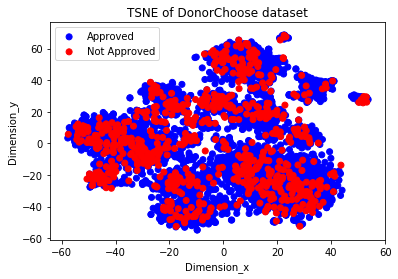

In [494]:

#importing required libraries
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt


#getting y column as project_is_approved
y = project_data['project_is_approved'].values;

#Configuring TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=7000);
X_embedding = tsne.fit_transform(first_matrix);

#Combining obtained two dimensions from t-SNE with output column which project_is_approved.
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))

#preparing pandas dataFrame for plotting scatter plot
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Approved'])

#defining colors to be used for classifying, here we are using 'red' for Rejected projects and 'blue' for Approved projects
colors = {0:'red', 1:'blue'}

#plotting scatter plot for approved and rejected projects with obtained two new dimensions from t-SNE.
plt.scatter(for_tsne_df[for_tsne_df.Approved == 1].Dimension_x, for_tsne_df[for_tsne_df.Approved == 1].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 1].Approved.apply(lambda x: colors[x]), label='Approved');
plt.scatter(for_tsne_df[for_tsne_df.Approved == 0].Dimension_x, for_tsne_df[for_tsne_df.Approved == 0].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 0].Approved.apply(lambda x: colors[x]), label='Not Approved');
plt.xlabel('Dimension_x');
plt.ylabel('Dimension_y');
plt.title('TSNE of DonorChoose dataset');
plt.legend(loc='best');
plt.show()

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

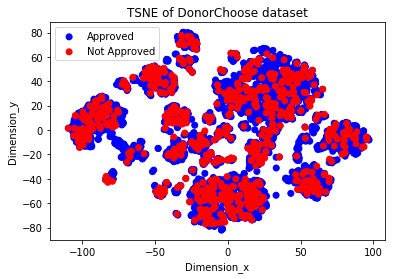

In [495]:

#getting y column as project_is_approved
y = project_data['project_is_approved'].values;

#Configuring TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=5000);

X_embedding = tsne.fit_transform(second_matrix);

#Combining obtained two dimensions from t-SNE with output column which project_is_approved.
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))

#preparing pandas dataFrame for plotting scatter plot
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Approved'])

#defining colors to be used for classifying, here we are using 'red' for Rejected projects and 'blue' for Approved projects
colors = {0:'red', 1:'blue'}

#plotting scatter plot for approved and rejected projects with obtained two new dimensions from t-SNE.
plt.scatter(for_tsne_df[for_tsne_df.Approved == 1].Dimension_x, for_tsne_df[for_tsne_df.Approved == 1].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 1].Approved.apply(lambda x: colors[x]), label='Approved');
plt.scatter(for_tsne_df[for_tsne_df.Approved == 0].Dimension_x, for_tsne_df[for_tsne_df.Approved == 0].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 0].Approved.apply(lambda x: colors[x]), label='Not Approved');
plt.xlabel('Dimension_x');
plt.ylabel('Dimension_y');
plt.title('TSNE of DonorChoose dataset');
plt.legend(loc='best');
plt.show()

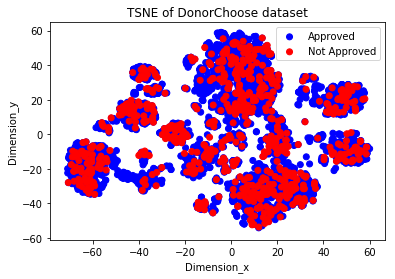

In [496]:

#getting y column as project_is_approved
y = project_data['project_is_approved'].values;

#Configuring TSNE
tsne = TSNE(n_components=2, perplexity=100, learning_rate=200, n_iter=7000);

X_embedding = tsne.fit_transform(second_matrix);

#Combining obtained two dimensions from t-SNE with output column which project_is_approved.
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))

#preparing pandas dataFrame for plotting scatter plot
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Approved'])

#defining colors to be used for classifying, here we are using 'red' for Rejected projects and 'blue' for Approved projects
colors = {0:'red', 1:'blue'}

#plotting scatter plot for approved and rejected projects with obtained two new dimensions from t-SNE.
plt.scatter(for_tsne_df[for_tsne_df.Approved == 1].Dimension_x, for_tsne_df[for_tsne_df.Approved == 1].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 1].Approved.apply(lambda x: colors[x]), label='Approved');
plt.scatter(for_tsne_df[for_tsne_df.Approved == 0].Dimension_x, for_tsne_df[for_tsne_df.Approved == 0].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 0].Approved.apply(lambda x: colors[x]), label='Not Approved');
plt.xlabel('Dimension_x');
plt.ylabel('Dimension_y');
plt.title('TSNE of DonorChoose dataset');
plt.legend(loc='best');
plt.show()

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

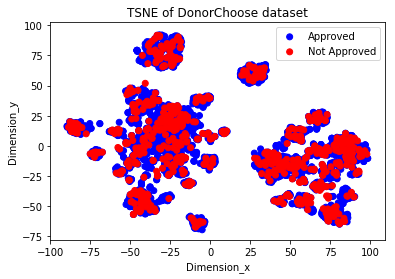

In [497]:

#getting y column as project_is_approved
y = project_data['project_is_approved'].values;

#Configuring TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=5000);

X_embedding = tsne.fit_transform(third_matrix);

#Combining obtained two dimensions from t-SNE with output column which project_is_approved.
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))

#preparing pandas dataFrame for plotting scatter plot
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Approved'])

#defining colors to be used for classifying, here we are using 'red' for Rejected projects and 'blue' for Approved projects
colors = {0:'red', 1:'blue'}

#plotting scatter plot for approved and rejected projects with obtained two new dimensions from t-SNE.
plt.scatter(for_tsne_df[for_tsne_df.Approved == 1].Dimension_x, for_tsne_df[for_tsne_df.Approved == 1].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 1].Approved.apply(lambda x: colors[x]), label='Approved');
plt.scatter(for_tsne_df[for_tsne_df.Approved == 0].Dimension_x, for_tsne_df[for_tsne_df.Approved == 0].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 0].Approved.apply(lambda x: colors[x]), label='Not Approved');
plt.xlabel('Dimension_x');
plt.ylabel('Dimension_y');
plt.title('TSNE of DonorChoose dataset')
plt.legend(loc='best');
plt.show()

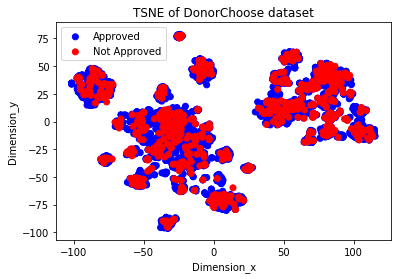

In [498]:

#getting y column as project_is_approved
y = project_data['project_is_approved'].values;

#Configuring TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=7000);

X_embedding = tsne.fit_transform(third_matrix);

#Combining obtained two dimensions from t-SNE with output column which project_is_approved.
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))

#preparing pandas dataFrame for plotting scatter plot
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Approved'])

#defining colors to be used for classifying, here we are using 'red' for Rejected projects and 'blue' for Approved projects
colors = {0:'red', 1:'blue'}

#plotting scatter plot for approved and rejected projects with obtained two new dimensions from t-SNE.
plt.scatter(for_tsne_df[for_tsne_df.Approved == 1].Dimension_x, for_tsne_df[for_tsne_df.Approved == 1].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 1].Approved.apply(lambda x: colors[x]), label='Approved');
plt.scatter(for_tsne_df[for_tsne_df.Approved == 0].Dimension_x, for_tsne_df[for_tsne_df.Approved == 0].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 0].Approved.apply(lambda x: colors[x]), label='Not Approved');
plt.xlabel('Dimension_x');
plt.ylabel('Dimension_y');
plt.title('TSNE of DonorChoose dataset');
plt.legend(loc='best');
plt.show()

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

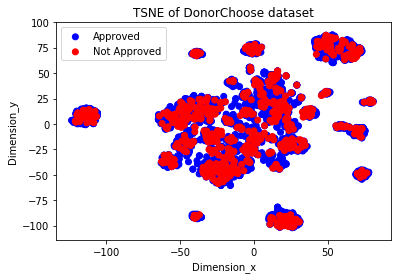

In [499]:

#getting y column as project_is_approved
y = project_data['project_is_approved'].values;

#Configuring TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=5000);

X_embedding = tsne.fit_transform(fourth_matrix);

#Combining obtained two dimensions from t-SNE with output column which project_is_approved.
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))

#preparing pandas dataFrame for plotting scatter plot
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Approved'])

#defining colors to be used for classifying, here we are using 'red' for Rejected projects and 'blue' for Approved projects
colors = {0:'red', 1:'blue'}

#plotting scatter plot for approved and rejected projects with obtained two new dimensions from t-SNE.
plt.scatter(for_tsne_df[for_tsne_df.Approved == 1].Dimension_x, for_tsne_df[for_tsne_df.Approved == 1].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 1].Approved.apply(lambda x: colors[x]), label='Approved');
plt.scatter(for_tsne_df[for_tsne_df.Approved == 0].Dimension_x, for_tsne_df[for_tsne_df.Approved == 0].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 0].Approved.apply(lambda x: colors[x]), label='Not Approved');
plt.xlabel('Dimension_x');
plt.ylabel('Dimension_y');
plt.title('TSNE of DonorChoose dataset');
plt.legend(loc='best');
plt.show()

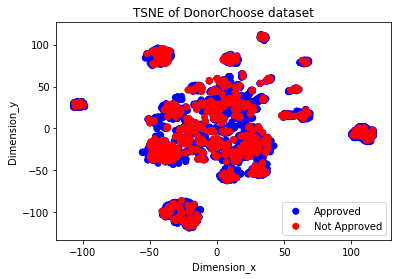

In [500]:

#getting y column as project_is_approved
y = project_data['project_is_approved'].values;

#Configuring TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=7000);
X_embedding = tsne.fit_transform(fourth_matrix);

#Combining obtained two dimensions from t-SNE with output column which project_is_approved.
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))

#preparing pandas dataFrame for plotting scatter plot
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Approved'])

#defining colors to be used for classifying, here we are using 'red' for Rejected projects and 'blue' for Approved projects
colors = {0:'red', 1:'blue'}

#plotting scatter plot for approved and rejected projects with obtained two new dimensions from t-SNE.
plt.scatter(for_tsne_df[for_tsne_df.Approved == 1].Dimension_x, for_tsne_df[for_tsne_df.Approved == 1].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 1].Approved.apply(lambda x: colors[x]), label='Approved');
plt.scatter(for_tsne_df[for_tsne_df.Approved == 0].Dimension_x, for_tsne_df[for_tsne_df.Approved == 0].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 0].Approved.apply(lambda x: colors[x]), label='Not Approved');
plt.xlabel('Dimension_x');
plt.ylabel('Dimension_y');
plt.title('TSNE of DonorChoose dataset')
plt.legend(loc='best');
plt.show()

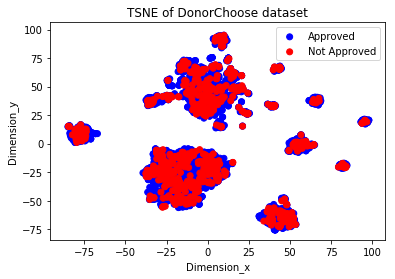

In [501]:

#t-SNE for final matrix after merging all the features.

#getting y column as project_is_approved
y = project_data['project_is_approved'].values;

#Configuring TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=5000);
X_embedding = tsne.fit_transform(final_matrix);

#Combining obtained two dimensions from t-SNE with output column which project_is_approved.
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))

#preparing pandas dataFrame for plotting scatter plot
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Approved'])

#defining colors to be used for classifying, here we are using 'red' for Rejected projects and 'blue' for Approved projects
colors = {0:'red', 1:'blue'}

#plotting scatter plot for approved and rejected projects with obtained two new dimensions from t-SNE.
plt.scatter(for_tsne_df[for_tsne_df.Approved == 1].Dimension_x, for_tsne_df[for_tsne_df.Approved == 1].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 1].Approved.apply(lambda x: colors[x]), label='Approved');
plt.scatter(for_tsne_df[for_tsne_df.Approved == 0].Dimension_x, for_tsne_df[for_tsne_df.Approved == 0].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 0].Approved.apply(lambda x: colors[x]), label='Not Approved');
plt.xlabel('Dimension_x')
plt.ylabel('Dimension_y');
plt.title('TSNE of DonorChoose dataset')
plt.legend(loc='best');
plt.show()

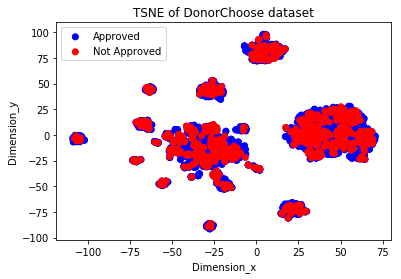

In [502]:
#Combining obtained two dimensions from t-SNE with output column which project_is_approved.

#getting y column as project_is_approved
y = project_data['project_is_approved'].values;

#Configuring TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=5000);
X_embedding = tsne.fit_transform(final_matrix);

#Combining obtained two dimensions from t-SNE with output column which project_is_approved.
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))

#preparing pandas dataFrame for plotting scatter plot
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Approved'])

#defining colors to be used for classifying, here we are using 'red' for Rejected projects and 'blue' for Approved projects
colors = {0:'red', 1:'blue'}

#plotting scatter plot for approved and rejected projects with obtained two new dimensions from t-SNE.
plt.scatter(for_tsne_df[for_tsne_df.Approved == 1].Dimension_x, for_tsne_df[for_tsne_df.Approved == 1].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 1].Approved.apply(lambda x: colors[x]), label='Approved');
plt.scatter(for_tsne_df[for_tsne_df.Approved == 0].Dimension_x, for_tsne_df[for_tsne_df.Approved == 0].Dimension_y, c=for_tsne_df[for_tsne_df.Approved == 0].Approved.apply(lambda x: colors[x]), label='Not Approved');
plt.xlabel('Dimension_x');
plt.ylabel('Dimension_y');
plt.title('TSNE of DonorChoose dataset');
plt.legend(loc='best');
plt.show()

<h2> 2.5 Summary </h2>

### Observations:
* t-SNE's are created with 5k data points, 50 as perplexity and with 5000 & 7000 iterations.
* There are too much overlapping in all the t-SNE.
* We can't say directly by seeing any cluster, whether it's approved or not.
* Several small clusters are formed with data matrix containing tfidf, but these points in each clusters are overlapped, they are not distinguishing approved and not approved projects.
